In [1]:
import torch
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
from load_LIDC_data import LIDC_IDRI

In [2]:
!pip install pydicom

In [3]:
dataset = LIDC_IDRI(dataset_location = 'data/')

Loading file data_lidc.pickle


In [18]:
dataset_size = len(dataset)
print("Number of samples: ",  dataset_size)

nb_param = len(dataset[0])
print("Nombre de param: ",  nb_param)

trois_dim = len(dataset[0][0])
print("3e dimension: ",  trois_dim)

dim_quatre = len(dataset[0][0][0])
print("4e dimension: ",  dim_quatre)

dim_cinq = len(dataset[0][0][0][0])
print("5e dimension: ",  dim_cinq)



Number of samples:  15096
Nombre de param:  3
3e dimension:  1
4e dimension:  128
5e dimension:  128


In [5]:
ind = 0
img = dataset[ind][0].numpy()
label = dataset[ind][1].numpy()
print("Image properties:")
print("Class: ", type(img))
print("Dimensions of image: ", img.shape)
print("type of pixel: ", type(img[0][0][0]))

print(" ")
print("Label properties:")
print("Class: ", type(label))
print("Dimensions of label: ", label.shape)
print("type of pixel: ", type(label[0][0]))

Image properties:
Class:  <class 'numpy.ndarray'>
Dimensions of image:  (1, 128, 128)
type of pixel:  <class 'numpy.float32'>
 
Label properties:
Class:  <class 'numpy.ndarray'>
Dimensions of label:  (128, 128)
type of pixel:  <class 'numpy.float32'>


(-0.5, 127.5, 127.5, -0.5)

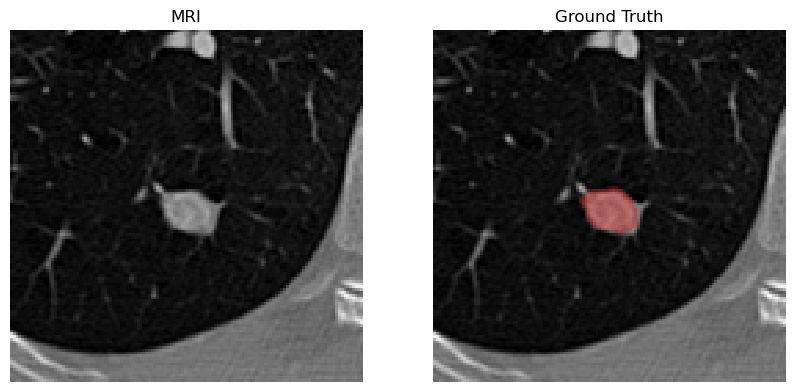

In [6]:
#from src.visualization import plot_overlay_segmentation

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

f, axarr = plt.subplots(1, 2, figsize=(10,5))
axarr[0].imshow(img[0, :, :], 'gray', interpolation='none', aspect=1)
axarr[0].set_title("MRI")
axarr[0].axis('off')

true_color = np.zeros((label.shape[0], label.shape[1], 4), dtype='float32')
true_color[label > 0] = (1,0,0, 0.3)

axarr[1].imshow(img[0, :, :], 'gray', interpolation='none', aspect=1)
axarr[1].imshow(true_color, interpolation='none', aspect=1)
axarr[1].set_title("Ground Truth")
axarr[1].axis('off')


Dimensions of label:  (128, 128)
series_uid:  1.3.6.1.4.1.14519.5.2.1.6279.6001.185154482385982570363528682299
type series_uid:  <class 'pydicom.uid.UID'>


(-0.5, 127.5, 127.5, -0.5)

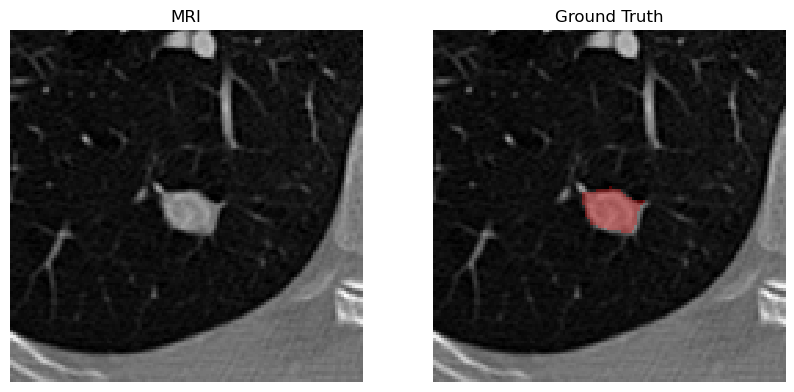

In [8]:
ind = 0
img = dataset[ind][0].numpy()
label = dataset[ind][1].numpy()
series_uid = dataset[ind][2]
print("Dimensions of label: ", label.shape)
print("series_uid: ", series_uid)
print("type series_uid: ", type(series_uid))
f, axarr = plt.subplots(1, 2, figsize=(10,5))
axarr[0].imshow(img[0, :, :], 'gray', interpolation='none', aspect=1)
axarr[0].set_title("MRI")
axarr[0].axis('off')
true_color = np.zeros((label.shape[0], label.shape[1], 4), dtype='float32')
true_color[label > 0] = (1,0,0, 0.3)
axarr[1].imshow(img[0, :, :], 'gray', interpolation='none', aspect=1)
axarr[1].imshow(true_color, interpolation='none', aspect=1)
axarr[1].set_title("Ground Truth")
axarr[1].axis('off')

In [9]:
ind = 15096
img = dataset[ind][0].numpy()
label = dataset[ind][1].numpy()
series_uid = dataset[ind][2]
print("Dimensions of label: ", label.shape)
print("series_uid: ", series_uid)
print("type series_uid: ", type(series_uid))
f, axarr = plt.subplots(1, 2, figsize=(10,5))
axarr[0].imshow(img[0, :, :], 'gray', interpolation='none', aspect=1)
axarr[0].set_title("MRI")
axarr[0].axis('off')
true_color = np.zeros((label.shape[0], label.shape[1], 4), dtype='float32')
true_color[label > 0] = (1,0,0, 0.3)
axarr[1].imshow(img[0, :, :], 'gray', interpolation='none', aspect=1)
axarr[1].imshow(true_color, interpolation='none', aspect=1)
axarr[1].set_title("Ground Truth")
axarr[1].axis('off')

IndexError: list index out of range

(-0.5, 127.5, 127.5, -0.5)

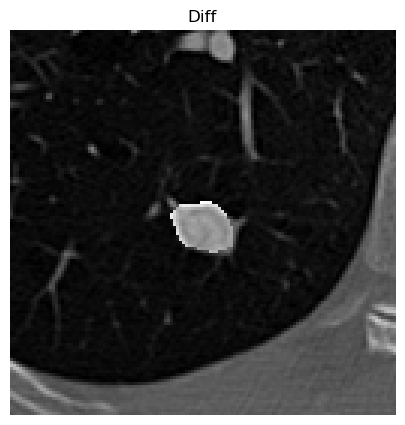

In [10]:
img_ref = dataset[0][0].numpy()
img = dataset[0][1].numpy()
diff = abs(img_ref-img)

f, axarr = plt.subplots(1, 1, figsize=(10,5))
axarr.imshow(diff[0, :, :], 'gray', interpolation='none', aspect=1)
axarr.set_title("Diff")
axarr.axis('off')


In [14]:
img_ref = dataset[0][0].numpy()
for i in range(dataset_size):
    img = dataset[i][0].numpy()
    diff = abs(img_ref-img)
    val = diff.sum()
    if (val == 0):
        print(i)

0


In [15]:
indices = list(range(dataset_size))
split = int(np.floor(0.1 * dataset_size))
np.random.shuffle(indices)
train_indices, test_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)